## Word features

Welcome to my WordGame project! In this second notebook, ...
Number of words!

First we do the usual library imports and stuff. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # data visualization

from subprocess import check_output
#print(check_output(["ls", "../input/wordgame"]).decode("utf8"))

# color palette for plotting
pal = sns.color_palette("Paired", 10)

colors = ["magenta", "red", "purple","blue","green","yellow","brown","tan","orange","pink"]
pal = sns.xkcd_palette(colors)
sns.palplot(sns.xkcd_palette(colors))
sns.palplot(sns.hls_palette(10, l=.3, s=.8))

# use a bigger fontsize in the plots by default 
sns.set(font_scale=1.5)



Now, let's open up the dataset.

In [8]:
#df = pd.read_csv('../input/wordgame/wordgame_20170628.csv', dtype='object')
df = pd.read_csv('../data/processed/wordgame_small.csv')

#load the alphabetical list of source names
with open('../data/processed/sources.csv') as f:
    sources_list = f.read().splitlines()

#print(df.dtypes)

#print dataset dimensions
print(df.shape)

#print first 5 rows
df.head()

(66882, 8)


,user,forum,word,association,forumID,af,tf,tf10
0,Whitney,SAS,me,you,6,10,0.001196,0.000952
1,Cat Montgomery,SAS,divide,multiply,6,20,0.000120,0.000100
2,JoanJ,ECF,little,small,3,1246,0.000269,0.000581
3,Batgirl,SAS,taste,nacho,6,55,0.000359,0.000351
4,Cerberios,SAS,best,winner,6,3,0.000135,0.000150


## Word length
We are now ready to extract our first feature, which will be the word length. I do not expect any differences between NT'ers and ASD'ers, although I'm curious to what is the average length of English words. 

Longest word: 38
Longest word: 129


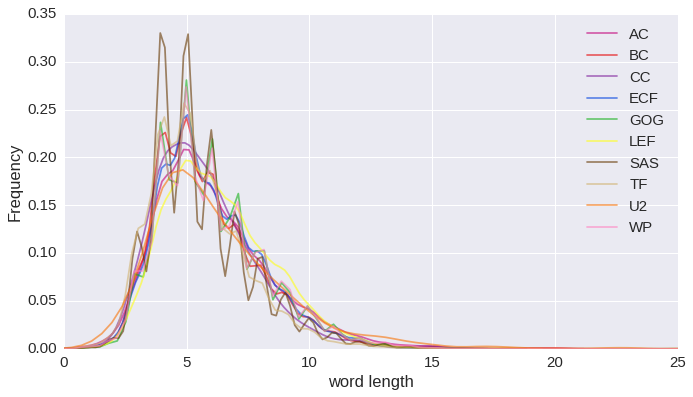

In [12]:
df['word'] = df['word'].astype(str)
df['association'] = df['association'].astype(str)
df['forumID'] = df['forumID'].astype(int)

df['len1'] = df['word'].apply(lambda x:len(x))
df['len2'] = df['association'].apply(lambda x:len(x))

print("Longest word: " +str(df['len1'].max()))
print("Longest word: " +str(df['len2'].max()))

plt.figure(figsize=(11, 6))
for i in range(0,10):
    s = df[df['forumID']==i]
    g = sns.kdeplot(s['len1'], alpha=0.6, label=sources_list[i], color=pal[i])  
#g = sns.kdeplot(df['len1'], color="black", label="all data")  
plt.xlabel('word length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([0,25])
plt.show()

english average is 5. -> ecig. 

## Word length difference
We can also look at the difference between the word lenght of word1 and word2.



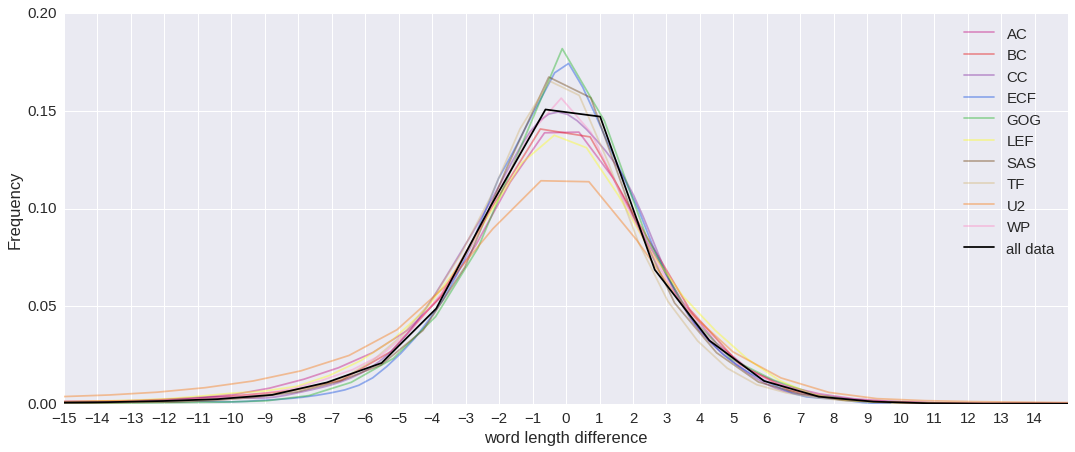

In [13]:
df['d_len'] = df['len1'] - df['len2']

plt.figure(figsize=(18, 7))
for i in range(0,10):
    s = df[df['forumID']==i]
    g = sns.kdeplot(s['d_len'], alpha=0.4, label=sources_list[i], color=pal[i])  
g = sns.kdeplot(df['d_len'], color="black", label="all data")  
g.set(xticks=np.arange(-15,15))
plt.xlabel('word length difference')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([-15,15])

'''
plt.subplot(1,2,2)
g = sns.kdeplot(df['len1'], df['len2'], shade=True)  
plt.xlabel('length word1')
plt.ylabel('length word2')
axes = plt.gca()
axes.set_xlim([1,13])
axes.set_ylim([1,13])
'''
plt.show()



:)

## Levenshtein Distance
...


Mean edit distance: 0.99437272459


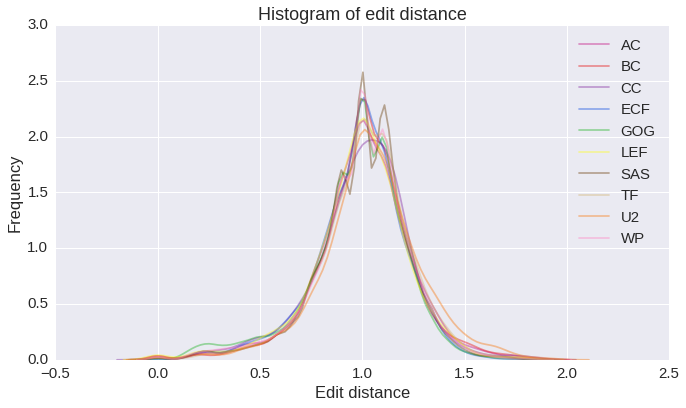

In [31]:
import Levenshtein

def levenshtein(r):
	return Levenshtein.distance(r.word, r.association)

#calculate levenstein distance on each row and add to dataframe
df['edit'] = df.apply(levenshtein, axis=1)
df['edit'] = df['edit']/(0.5*(df['len1']+df['len2']))

#print mean edit distance
print("Mean edit distance: "+ str(df['edit'].mean()))

#Plot
#df['forumID'] = df['forumID'].astype(int)

plt.figure(figsize=(11, 6))
#g = sns.kdeplot(df[df['forumID']<1], kde=False, label="ass")  
for i in range(0,10):
    s = df[df['forumID']==i]
    g = sns.kdeplot(s['edit'], alpha=0.4, label=sources_list[i], color=pal[i])  
plt.title('Histogram of edit distance')
plt.xlabel('Edit distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
#axes = plt.gca()
#axes.set_xlim([0,25])
#axes.set_ylim([0,0.015])
plt.show()

In [36]:
# compute word count
df['word_count1'] = df['word1'].apply(lambda x:(x.replace('  ',' ').count(' ')+1))

print(df.word_count1.mean())

1.14742123603


Most word associations are single words. 

In [13]:
import os
def prefix(r):
    p = os.path.commonprefix([r.word1, r.word2])
    return (p, len(p))
def suffix(r):
    s = os.path.commonprefix([r.word1[::-1], r.word2[::-1]])
    s = s[::-1]
    return (s, len(s))

df['prefix'], df['pl'] = zip(*df.apply(prefix, axis=1))
df['pln'] = df['pl']/(0.5*(df['len1']+df['len2'])) #normalized
df['suffix'], df['sl'] = zip(*df.apply(suffix, axis=1))
df['sln'] = df['sl']/(0.5*(df['len1']+df['len2'])) #normalized





print(df['pln'].mean())
print(df['pl'].max())


0.0340045133144
50


In [14]:
def prefix_s(r):
    p = os.path.commonprefix([r.word1, r.word2_s])
    return (p, len(p))

def suffix_s(r):
    s = os.path.commonprefix([r.word1[::-1], r.word2_s[::-1]])
    s = s[::-1]
    return (s, len(s))

shuffled = df['word2'].sample(frac=1).tolist()
df['word2_s'] = shuffled
df['len2_s'] = df['word2_s'].apply(lambda x:len(x))


df['prefix_s'], df['pl_s'] = zip(*df.apply(prefix_s, axis=1))
df['pln_s'] = df['pl_s']/(0.5*(df['len1']+df['len2_s'])) #normalized

df['suffix_s'], df['sl_s'] = zip(*df.apply(suffix_s, axis=1))
df['sln_s'] = df['sl_s']/(0.5*(df['len1']+df['len2_s'])) #normalized


px_s = df[df['pl_s']>1].prefix_s.value_counts().head(10)
sx_s = df[df['sl_s']>1].suffix_s.value_counts().head(10)

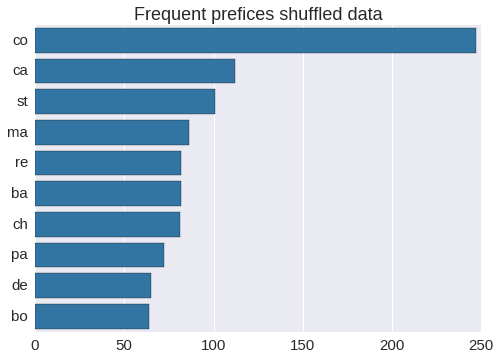

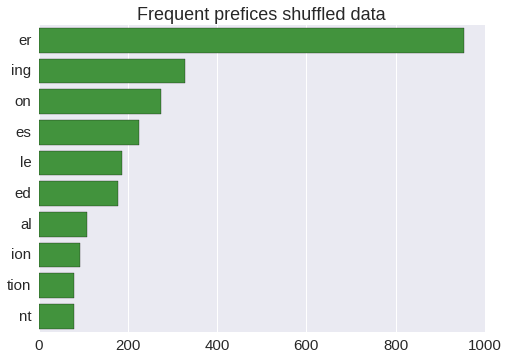

In [15]:
sns.barplot(px_s.tolist(), px_s.index, orient="h", color=pal[1])
plt.title("Frequent prefices shuffled data")
plt.show()

sns.barplot(sx_s.tolist(), sx_s.index, orient="h", color=pal[3])
plt.title("Frequent suffices shuffled data")
plt.show()

Number of pairs with common prefix or suffix: 35883


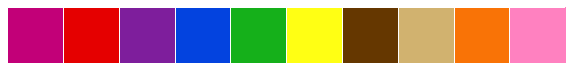

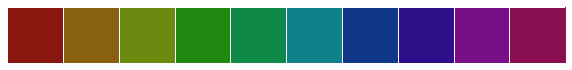

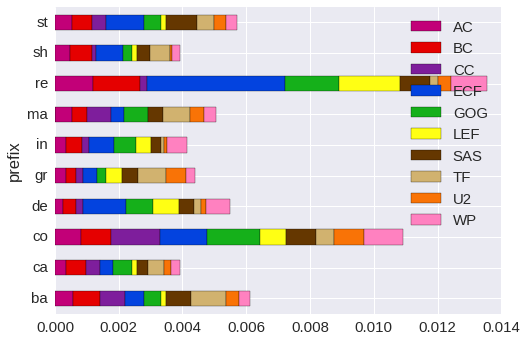

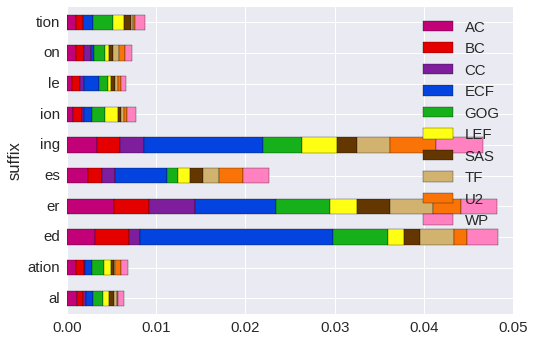

In [51]:
psdf = df[(df['pl']>1) | (df['sl']>1)]
print("Number of pairs with common prefix or suffix: " +str(len(psdf)))

#
px = psdf[psdf['pl']>1].prefix.value_counts().head(10)
sx = psdf[psdf['sl']>1].suffix.value_counts().head(10)

sample = df[df['prefix'].isin(px.index)]

# create crosstable
ct = pd.crosstab(sample.prefix, sample.sourceID)
#ct = pd.DataFrame(ct)

# normalize value counts by number of words in source
for i in range(0,len(sources_list)):
    ct[i] = ct[i]/(len(df[df['sourceID']==i])) #opt!

ct.columns = sources_list
    
#Plot
ct.plot.barh(stacked=True, color=pal)
plt.show()
#---------------------
sample = df[df['suffix'].isin(sx.index)]

# create crosstable
ct = pd.crosstab(sample.suffix, sample.sourceID)
#ct = pd.DataFrame(ct)

# normalize value counts by number of words in source
for i in range(0,len(sources_list)):
    ct[i] = ct[i]/(len(df[df['sourceID']==i])) #opt!

ct.columns = sources_list
    
#Plot
ct.plot.barh(stacked=True, color=pal)
plt.show()

Number of pairs with common prefix or suffix: 35883


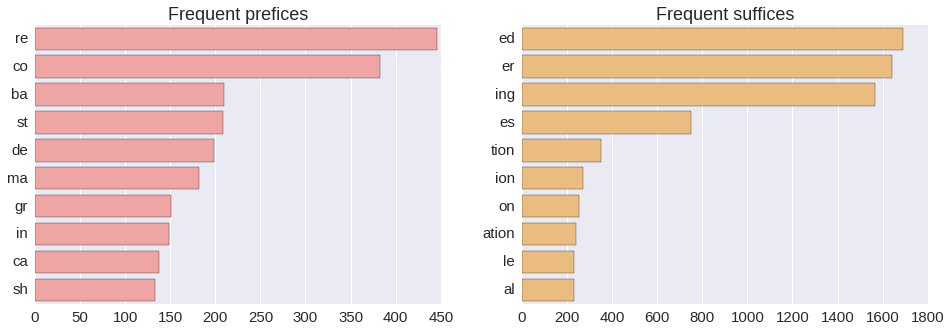

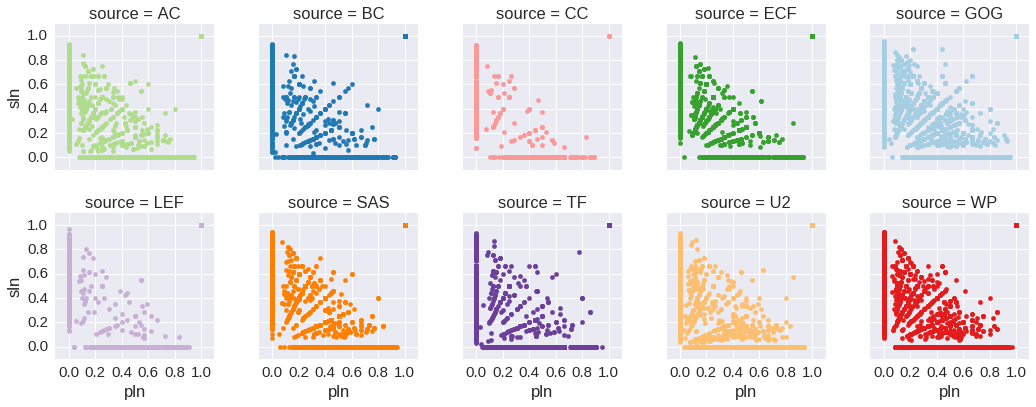

In [52]:
#Plot
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
sns.barplot(px.tolist(), px.index, orient="h", color=pal[4])
plt.title("Frequent prefices")
plt.subplot(1,2,2)
sns.barplot(sx.tolist(), sx.index, orient="h", color=pal[6])
plt.title("Frequent suffices")
plt.show()

cmapi = sns.light_palette(pal[1], as_cmap=True)

g = sns.FacetGrid(psdf, col="source", col_wrap=5, hue="source", palette=pal, col_order=sources_list)  
g.map(plt.scatter, "pln", "sln"),# n_levels=5, shade=True, cmap=cmapi)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

# Save

In [73]:


#set output filename
outfile = "../data/processed/wordgame_20170721_freq_basic.csv"

# write rows to file
df.to_csv(outfile, sep=',', index=False)
